In [2]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from sklearn import tree # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.model_selection import learning_curve # type: ignore
from sklearn.pipeline import make_pipeline # type: ignore
from sklearn.neighbors import KNeighborsClassifier



In [3]:
heart = pd.read_csv("./heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
missing_vals = heart.isnull().sum()
missing_vals[0:14]

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
temp = heart.dropna()
temp.shape

(1025, 14)

In [6]:
temp = heart.dropna(axis=1)
temp.shape

(1025, 14)

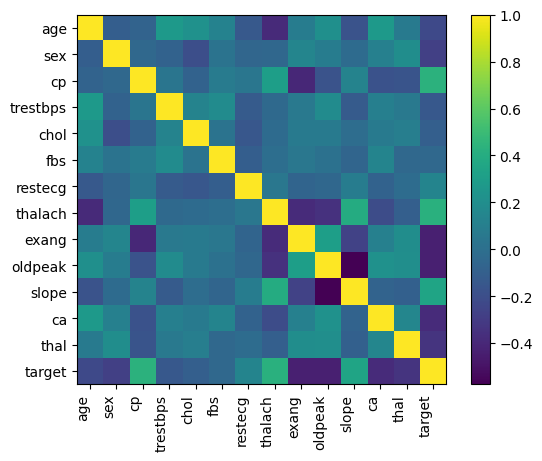

In [7]:
data = heart
corrmat = data.corr()
plt.imshow(corrmat)
plt.colorbar()

# gathering the names for the labels
vars = []
for i in corrmat.columns:
  vars.append(i)

# labelling, note the 90 degree rotation
plt.xticks(range(len(corrmat)), vars, rotation=90, ha='right')
plt.yticks(range(len(corrmat)), vars)
plt.show()

In [8]:
corrmat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [9]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=0)

In [10]:
def dividingdata(data): 
  trgt = data['target']
  dt = data.drop('target', axis=1)
  X = dt
  Y = trgt

  return X, Y

In [11]:
x_train, y_train = dividingdata(trainset)
x_test, y_test = dividingdata(testset)

In [12]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

This code snippet is performing a learning curve analysis for a classifier model (`clf`) using the training data (`x_train`, `y_train`). Here's a breakdown of what each part does:

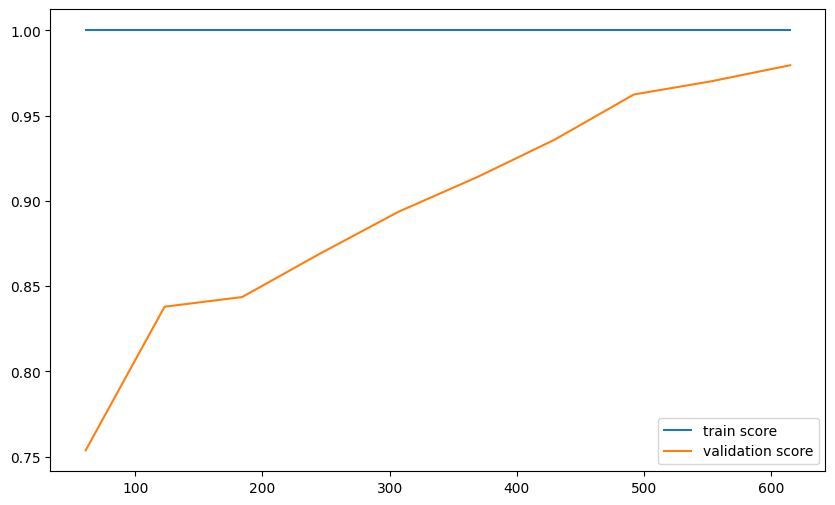

In [13]:
N, train_score, val_score = learning_curve(clf, x_train, y_train, cv=4 , scoring='f1', train_sizes=np.linspace(0.1,1,10))
plt.figure(figsize=(10, 6))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

This function `model_final` takes in a 2D array `y_probs` containing predicted probabilities for each class, and an optional threshold value. It then returns a boolean array indicating whether the predicted probability for class 1 is greater than the specified threshold.


In [14]:
def model_final(y_probs, threshold=0):
    return y_probs[:, 1] > threshold

`y_probs = clf.predict_proba(x_test)` is a method call that is used to predict the probabilities of the classes for the input data `x_test` using the trained classifier `clf`. The output `y_probs` will be an array of shape (n_samples, n_classes) where each row represents the probabilities of each class for the corresponding sample in `x_test`.


In [15]:
y_probs = clf.predict_proba(x_test)

This line of code is calling a function `model_final` with two arguments `y_probs` and `threshold=-1`. The function `model_final` is likely used to make predictions based on the input probabilities `y_probs`. The `threshold=-1` argument suggests that the function may use a threshold value of -1 to determine the predicted output. The function will return the predicted values which are then assigned to the variable `y_pred`.


In [16]:
y_pred = model_final(y_probs, threshold=-1)

In [17]:
from sklearn.metrics import*  # type: ignore

The `f1_score(y_test, y_pred)` function calculates the F1 score, which is a metric used to evaluate the performance of a classification model. It takes two parameters: `y_test`, which is the true labels of the test data, and `y_pred`, which is the predicted labels generated by the model. The F1 score is the harmonic mean of precision and recall, and it provides a balance between these two metrics.


In [18]:
f1_score(y_test, y_pred)

0.6858974358974359

The `recall_score(y_test, y_pred)` function calculates the recall score, which is a metric used in classification tasks to evaluate the ability of a model to correctly identify all relevant instances. It is calculated as the ratio of true positive predictions to the sum of true positives and false negatives. A high recall score indicates that the model is good at identifying all positive instances in the dataset.


In [19]:
recall_score(y_test, y_pred)

1.0

The `precision_score(y_test, y_pred)` function is calculating the precision score for a classification model's predictions. Precision is a metric that measures the proportion of true positive predictions (correctly predicted positive instances) out of all positive predictions made by the model. It is calculated as:


In [20]:
precision_score(y_test, y_pred)


0.5219512195121951

This code snippet is saving a machine learning model using the `pickle` module in Python. Here's a breakdown of what each part of the code is doing:

In [21]:
import pickle

# Sauvegarder le modèle SVM
with open('tree_model.txt', 'wb') as model_file:
    pickle.dump(clf, model_file)